In [101]:
__list="lyrics/__list.txt"
lyrics_path="lyrics/"
path_list=[]
with open(__list,'r') as fp:
    path=fp.readline().strip('\n')
    while path!="":
        path_list.append(lyrics_path+path)
        path=fp.readline().strip('\n')
print(path_list)
print(len(path_list))

['lyrics/adele.txt', 'lyrics/al-green.txt', 'lyrics/alicia-keys.txt', 'lyrics/amy-winehouse.txt', 'lyrics/beatles.txt', 'lyrics/bieber.txt', 'lyrics/bjork.txt', 'lyrics/blink-182.txt', 'lyrics/bob-dylan.txt', 'lyrics/bob-marley.txt', 'lyrics/britney-spears.txt', 'lyrics/bruce-springsteen.txt', 'lyrics/bruno-mars.txt', 'lyrics/cake.txt', 'lyrics/dickinson.txt', 'lyrics/disney.txt', 'lyrics/dj-khaled.txt', 'lyrics/dolly-parton.txt', 'lyrics/dr-seuss.txt', 'lyrics/drake.txt', 'lyrics/eminem.txt', 'lyrics/janisjoplin.txt', 'lyrics/jimi-hendrix.txt', 'lyrics/johnny-cash.txt', 'lyrics/joni-mitchell.txt', 'lyrics/kanye-west.txt', 'lyrics/kanye.txt', 'lyrics/Kanye_West.txt', 'lyrics/lady-gaga.txt', 'lyrics/leonard-cohen.txt', 'lyrics/lil-wayne.txt', 'lyrics/Lil_Wayne.txt', 'lyrics/lin-manuel-miranda.txt', 'lyrics/lorde.txt', 'lyrics/ludacris.txt', 'lyrics/michael-jackson.txt', 'lyrics/missy-elliott.txt', 'lyrics/nickelback.txt', 'lyrics/nicki-minaj.txt', 'lyrics/nirvana.txt', 'lyrics/notorious

In [102]:
dataset=[]
for item in path_list[49:]:
    with open(item,'r',encoding='utf-8') as fp:
        song=fp.read()
        dataset+=song.lower().split('\n')
print(len(dataset))

4863


In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
import random
import shutil

In [104]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(dataset)
total_words=len(tokenizer.word_index)+1
print(total_words)

2416


In [105]:
input_sequences=[]
for line in dataset:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequences=token_list[:i+1]
        input_sequences.append(n_gram_sequences)
print(len(input_sequences))

30735


In [106]:
max_sequence_len=max([len(x) for x in input_sequences])
print(max_sequence_len)

23


In [107]:
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))
xs=input_sequences[:,:-1]
labels=input_sequences[:,-1]
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)
print(len(ys))

30735


In [108]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)))
model.add(tf.keras.layers.Dense(total_words,activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 22, 64)            154624    
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 200)               132000    
_________________________________________________________________
dense_12 (Dense)             (None, 2416)              485616    
Total params: 772,240
Trainable params: 772,240
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss=tf.losses.categorical_crossentropy,optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
history=model.fit(xs,ys,epochs=50)

Epoch 1/50
961/961 [==============================] - 14s 13ms/step - loss: 5.2919 - accuracy: 0.1342
Epoch 2/50
961/961 [==============================] - 13s 13ms/step - loss: 3.8611 - accuracy: 0.2905
Epoch 3/50
961/961 [==============================] - 13s 14ms/step - loss: 3.1144 - accuracy: 0.3818
Epoch 4/50
961/961 [==============================] - 13s 14ms/step - loss: 2.6606 - accuracy: 0.4398
Epoch 5/50
961/961 [==============================] - 13s 14ms/step - loss: 2.3539 - accuracy: 0.4796
Epoch 6/50
961/961 [==============================] - 14s 14ms/step - loss: 2.1379 - accuracy: 0.5160
Epoch 7/50
961/961 [==============================] - 14s 14ms/step - loss: 1.9995 - accuracy: 0.5356
Epoch 8/50
961/961 [==============================] - 14s 14ms/step - loss: 1.8844 - accuracy: 0.5569
Epoch 9/50
961/961 [==============================] - 14s 14ms/step - loss: 1.7978 - accuracy: 0.5710
Epoch 10/50
961/961 [==============================] - 14s 14ms/step - loss: 1.779

<Figure size 432x288 with 0 Axes>

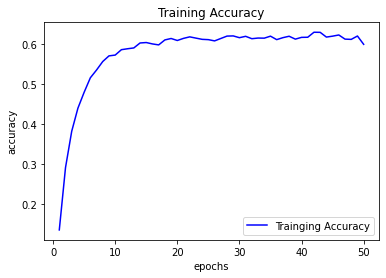

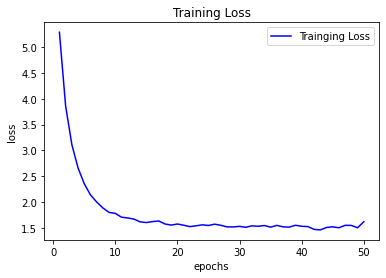

<Figure size 432x288 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1,1+len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Trainging Accuracy'])
plt.figure()

plt.plot(epochs,loss,'b',label='Training Loss')
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Trainging Loss'])
plt.figure()

In [113]:
def Automatical_Generate_Sentence(seed_text,predict_length):
    for _ in range(predict_length):
        token_list=tokenizer.texts_to_sequences([seed_text])[0]
        token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
        predicted=model.predict_classes(token_list,verbose=0)
        output_word=""
        for word,index in tokenizer.word_index.items():
            if index==predicted:
                output_word=word
                break
        seed_text+=" "+output_word
    return seed_text

In [114]:
predict_text="you are so beautiful"
predict_length=200
print(Automatical_Generate_Sentence(seed_text=predict_text,predict_length=predict_length))

you are so beautiful wonderful whoa there if you could been finally seen you all this time is bad end up dreaming with this love you almost forget how you wonder if you know what we've worked for not bag and it rains you in love that i acted and you are in love true love in a daydream dress so you not for you not this at me in the kitchen i put 'em to the things in the back door and i know i left it coming off how we're not speaking life before you know what you don't try to never grow up like like this is when the feeling sinks in girl when you smile it all you in the girls crowd the girls and girls hopeful i didn't 2017 to do to go and lock me out and threw a feast what first world together like anything to your face you and your sick things now now gotta should be alone i know i saw your face in it makes me like i don't ever had you as baby it loves me that does is do you stay this ain't day we never hung back time and stay here


In [112]:
model.save("Automatical_Generate_Sentence.h5")